# Introdução

## Importação das bibliotecas necessarias

In [1]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt

## Funções auxiliares

In [2]:
def return_sql_query(query_string):
    ret = {
        "token": {
            "token": token
        },
        "sql": {
            "sql": {
                "query":query_string
            }
        }
    }
    return ret

def json_to_df(resp):
    columns = [col['name'] for col in resp.json()['columns']]
    values = resp.json()['rows']  
    return pd.DataFrame(values, columns=columns)

def rows_and_columns_to_df(columns, rows):
    columns_array = [col['name'] for col in columns]
    return pd.DataFrame(rows, columns=columns_array)

def fetch_all_data_from_response(res, initial_records_rows):
    while 'cursor' in res.json():
        res_next = {
            "token": {
                "token": token
            },
            "sql": {
                "sql": {
                    "cursor": res.json()['cursor']
                }
            }
        }
        res = requests.post(os.path.join(url_base,'sql_query'), json=res_next)
        initial_records_rows+=res.json()['rows']
        sys.stdout.write('.')
        sys.stdout.flush()
    print('(y)')
    return initial_records_rows

## Dados de acesso a api

In [3]:
from IPython.display import clear_output
import getpass

token = getpass.getpass('Digite o seu token para acesso a API:')

clear_output()

In [4]:
url_base = "https://bigdata-api.fiocruz.br"

## Bases de dados disponiveis na API atualizadas

In [5]:
params = {
          "token": token
        }
resp = requests.post(url_base+ '/show_tables', json=params)
print(resp.json())

{'databases': ['datasus-sim', 'datasus-sinasc', 'datasus-sih']}


## Busca dos campos existentes na base SIM

In [6]:
%time
sql = {
          "token": {
            "token": token
          },
          "sql": {
            "sql": {"query":'describe "datasus-sim"'}
          }
        }
resp = requests.post(os.path.join(url_base,'sql_query'), json=sql)
#resp.content
fields = [x[0] for x in resp.json()['rows']]
print(fields)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.87 µs
['ACIDTRAB', 'ALTCAUSA', 'ASSISTMED', 'ATESTADO', 'ATESTANTE', 'CAUSABAS', 'CAUSABAS_O', 'CAUSAMAT', 'CB_PRE', 'CIRCOBITO', 'CIRURGIA', 'CODBAIOCOR', 'CODBAIRES', 'CODCART', 'CODESTAB', 'CODIFICADO', 'CODINST', 'CODMUNCART', 'CODMUNNATU', 'CODMUNOCOR', 'CODMUNRES', 'COMUNSVOIM', 'CONTADOR', 'CRM', 'DIFDATA', 'DTATESTADO', 'DTCADASTRO', 'DTCADINF', 'DTCADINV', 'DTCONCASO', 'DTCONINV', 'DTINVESTIG', 'DTNASC', 'DTOBITO', 'DTRECEBIM', 'DTRECORIG', 'DTRECORIGA', 'DTREGCART', 'ESC', 'ESC2010', 'ESCFALAGR1', 'ESCMAE', 'ESCMAE2010', 'ESCMAEAGR1', 'ESTABDESCR', 'ESTCIV', 'EXAME', 'EXPDIFDATA', 'FONTE', 'FONTEINV', 'FONTES', 'FONTESINF', 'GESTACAO', 'GRAVIDEZ', 'HORAOBITO', 'IDADE', 'IDADEMAE', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'LOCOCOR', 'MORTEPARTO', 'NATURAL', 'NECROPSIA', 'NUDIASINF', 'NUDIASOBCO', 'NUDIASOBIN', 'NUMERODN', 'NUMERODO', 'NUMERODV', 'NUMEROLOTE', 'NUMREGCART', 'NUMSUS', 'OBITOGRAV', 'OBITOPARTO', 

## Busca dos campos existentes na base SINASC

In [7]:
%time
sql = {
          "token": {
            "token": token
          },
          "sql": {
            "sql": {"query":'describe "datasus-sinasc"'}
          }
        }
resp = requests.post(os.path.join(url_base,'sql_query'), json=sql)
#resp.content
fields = [x[0] for x in resp.json()['rows']]
print(fields)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs
['APGAR1', 'APGAR5', 'CODANOMAL', 'CODBAINASC', 'CODBAIRES', 'CODCART', 'CODESTAB', 'CODINST', 'CODMUNCART', 'CODMUNNASC', 'CODMUNNATU', 'CODMUNRES', 'CODOCUPMAE', 'CODPAISRES', 'CODUFNATU', 'CONSPRENAT', 'CONSULTAS', 'CONTADOR', 'DIFDATA', 'DTCADASTRO', 'DTDECLARAC', 'DTNASC', 'DTNASCMAE', 'DTRECEBIM', 'DTRECORIG', 'DTRECORIGA', 'DTREGCART', 'DTULTMENST', 'ESCMAE', 'ESCMAE2010', 'ESCMAEAGR1', 'ESTCIVMAE', 'GESTACAO', 'GRAVIDEZ', 'HORANASC', 'IDADEMAE', 'IDADEPAI', 'IDANOMAL', 'KOTELCHUCK', 'LOCNASC', 'MESPRENAT', 'NATURALMAE', 'NOVO', 'NUMERODN', 'NUMERODV', 'NUMEROLOTE', 'NUMREGCART', 'ORIGEM', 'PARIDADE', 'PARTO', 'PESO', 'PREFIXODN', 'QTDFILMORT', 'QTDFILVIVO', 'QTDGESTANT', 'QTDPARTCES', 'QTDPARTNOR', 'RACACOR', 'RACACORMAE', 'RACACORN', 'RACACOR_RN', 'SEMAGESTAC', 'SERIESCMAE', 'SEXO', 'STCESPARTO', 'STDNEPIDEM', 'STDNNOVA', 'STTRABPART', 'TPAPRESENT', 'TPDOCRESP', 'TPFUNCRESP', 'TPMETESTIM', 'TPNASCASSI', 'TPROBSON'

# Proporção de mulheres com 3 ou mais partos anteriores

A ideia inicial era explorar os dados de todo o Brasil do período de 2012 a 2019.
Como a tabela SIH-RD tratada e filtrada que temos é do período de 2018 até 2019 e apenas do Estado de São Paulo, iremos utilizar o mesmo subconjunto.

In [8]:
%time
sql_t_nasc_vivos = return_sql_query("SELECT CODMUNRES, ano_nasc, count(*) as Qtd_Total  \
                    FROM \"datasus-sinasc\" \
                    WHERE anonasc>=2012 AND \
                    ano_nasc<=2019 \
                    GROUP BY CODMUNRES, ano_nasc")
resp_sql_t_nasc_vivos = requests.post(os.path.join(url_base,'sql_query'), json=sql_t_nasc_vivos)
#df_resp_sql_5robson = json_to_df(resp_sql_5robson)
record_columns=resp_sql_t_nasc_vivos.json()['columns']
record_rows=resp_sql_t_nasc_vivos.json()['rows']

fetch_all_data_from_response(resp_sql_t_nasc_vivos, record_rows)
print("Record rows length : "+str(len(record_rows)))

df_t_nasc_vivos = rows_and_columns_to_df(record_columns, record_rows)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
.............................................(y)
Record rows length : 44683


In [9]:
%time
sql_mais_de_3parto = return_sql_query("SELECT CODMUNRES, ano_nasc, count(*) as Qtd_mais_de_3parto  \
                    FROM \"datasus-sinasc\" \
                    WHERE ano_nasc>=2012 AND \
                    ano_nasc<=2019 AND \
                    QTDPARTNOR > 2 \
                    OR (QTDPARTNOR > 1 AND QTDPARTCES >0)\
                    OR (QTDPARTNOR > 0 AND QTDPARTCES >1)\
                    OR (QTDPARTNOR > 0 AND QTDPARTCES >1)\
                    OR QTDPARTCES > 2\
                    GROUP BY CODMUNRES, ano_nasc")

resp_sql_mais_de_3parto = requests.post(os.path.join(url_base,'sql_query'), json=sql_mais_de_3parto)
record_columns=resp_sql_mais_de_3parto.json()['columns']
record_rows=resp_sql_mais_de_3parto.json()['rows']

fetch_all_data_from_response(resp_sql_mais_de_3parto, record_rows)
print("Record rows length : "+str(len(record_rows)))

df_mais_de_3parto = rows_and_columns_to_df(record_columns, record_rows)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
................................................(y)
Record rows length : 47712


In [10]:
df_mais_de_3parto.head()

,CODMUNRES,ano_nasc,Qtd_mais_de_3parto
0,110000,2013,4
1,110000,2015,1
2,110000,2016,1
3,110000,2018,1
4,110001,2011,8


In [11]:
df_t_nasc_vivos.head()

,CODMUNRES,ano_nasc,Qtd_Total
0,110000,2012,2
1,110000,2013,16
2,110000,2014,4
3,110000,2015,4
4,110000,2016,2


In [12]:
df_merge = pd.merge(df_mais_de_3parto, df_t_nasc_vivos, how='right', on=['CODMUNRES','ano_nasc'])
df_merge = df_merge.fillna(0)
df_merge['Ratio'] = df_merge['Qtd_mais_de_3parto']/df_merge['Qtd_Total']
df_merge.head()

,CODMUNRES,ano_nasc,Qtd_mais_de_3parto,Qtd_Total,Ratio
0,110000,2012,0.0,2,0.00
1,110000,2013,4.0,16,0.25
2,110000,2014,0.0,4,0.00
3,110000,2015,1.0,4,0.25
4,110000,2016,1.0,2,0.50


In [15]:
%time
df_merge.to_csv('./csv_files/14.1-proporcao_com_3_ou_mais_partos_brasil.csv',index=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


# Gráficos

In [16]:
dataframe = pd.read_csv('./csv_files/14.1-proporcao_com_3_ou_mais_partos_brasil.csv')
dataframe.head(10)

,CODMUNRES,ano_nasc,Qtd_mais_de_3parto,Qtd_Total,Ratio
0,110000,2012,0.0,2,0.000000
1,110000,2013,4.0,16,0.250000
2,110000,2014,0.0,4,0.000000
3,110000,2015,1.0,4,0.250000
4,110000,2016,1.0,2,0.500000
5,110000,2018,1.0,2,0.500000
6,110000,2019,0.0,1,0.000000
7,110001,2012,46.0,386,0.119171
8,110001,2013,44.0,382,0.115183
9,110001,2014,40.0,341,0.117302


## Filtrar por Código de Município

In [31]:
subset_mun = dataframe[ dataframe["CODMUNRES"] == int( input("Diga o código do município que deseja visualizar: \n") ) ]
print()
subset_mun.head(10)
# SP-SP: 355030

Diga o código do município que deseja visualizar: 
 330455


,CODMUNRES,ano_nasc,Qtd_mais_de_3parto,Qtd_Total,Ratio
26031,330455,2012,5574.0,86549,0.064403
26032,330455,2013,3717.0,87661,0.042402
26033,330455,2014,3504.0,89991,0.038937
26034,330455,2015,3522.0,90694,0.038834
26035,330455,2016,3354.0,83166,0.040329
26036,330455,2017,3244.0,84521,0.038381
26037,330455,2018,3176.0,82554,0.038472
26038,330455,2019,2850.0,76803,0.037108


### Plot de Ratio por Ano no município escolhido

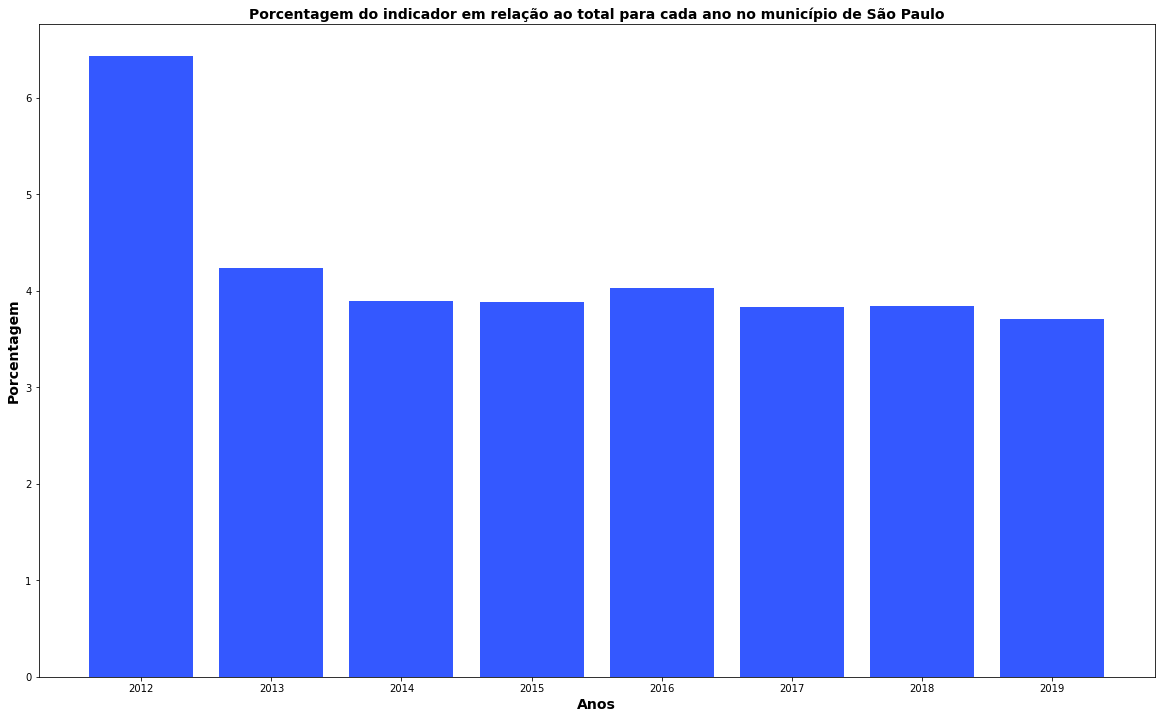

In [32]:
plt.figure(figsize=(20, 12))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title("Porcentagem do indicador em relação ao total para cada ano no município de São Paulo",**font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

plt.bar(subset_mun["ano_nasc"],100*subset_mun["Ratio"], color ='#3458FF')
plt.show()

### Plot em Stacked Bar do município escolhido

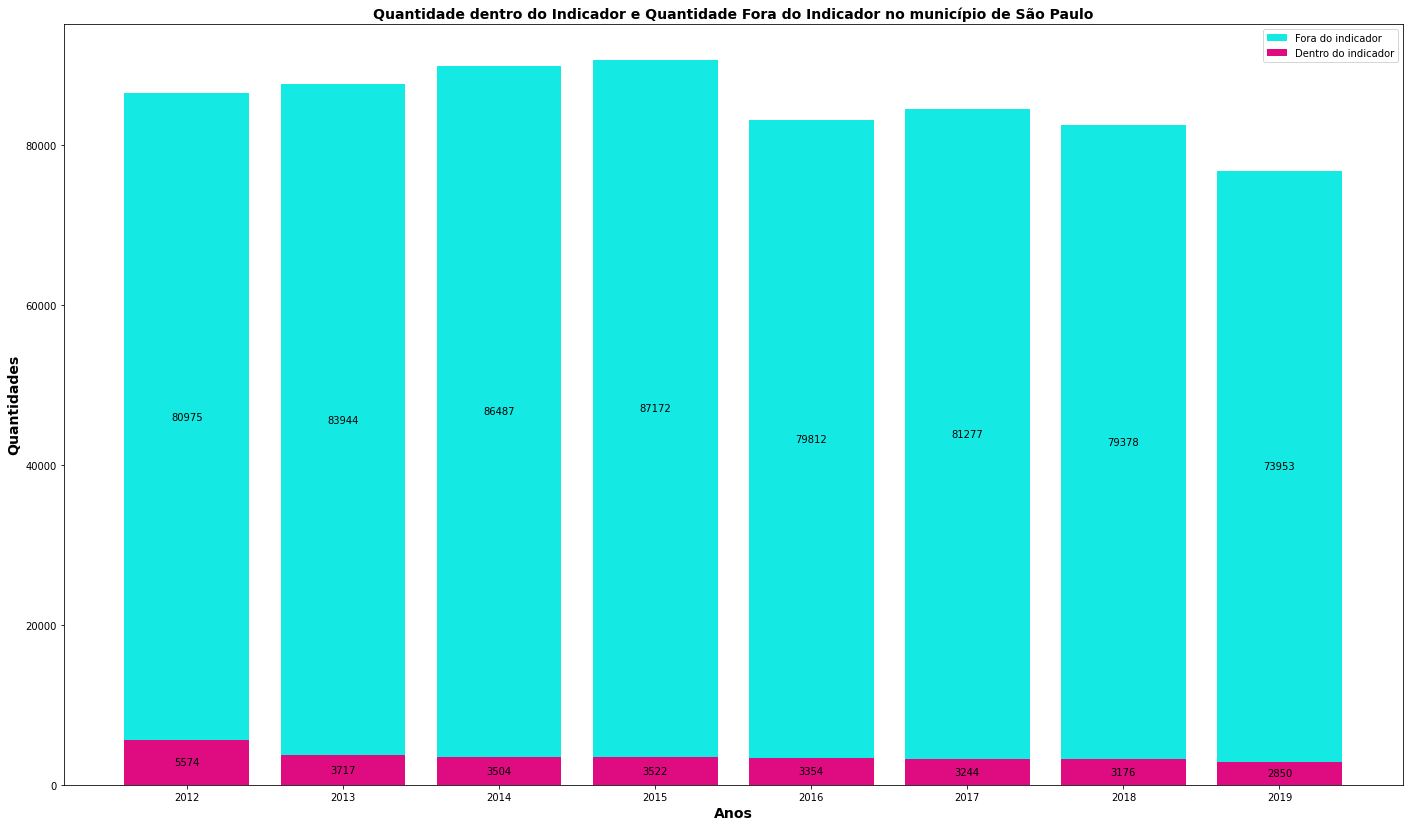

In [24]:
ano = subset_mun.columns[1] 
indicador = subset_mun.columns[2]
total = subset_mun.columns[3]

fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#15E9E4', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#DE0B81', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title("Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de São Paulo",**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

## Filtrar por ano

In [25]:
ano = subset_mun.columns[1] 
ano_int = int( input("Diga ano que deseja visualizar: \n") )
subset_ano = dataframe[ dataframe[ano] == ano_int ]
print()
subset_ano.head()

Diga ano que deseja visualizar: 
 2013


,CODMUNRES,ano_nasc,Qtd_mais_de_3parto,Qtd_Total,Ratio
1,110000,2013,2.0,16,0.125000
8,110001,2013,19.0,382,0.049738
16,110002,2013,75.0,1654,0.045345
24,110003,2013,2.0,74,0.027027
32,110004,2013,43.0,1185,0.036287
